Практикум №7 <br> Дисципліна: Обробка та аналіз БМД <br> Студент: Збаровський Дмитро <br> Група: БС-81

# Завдання

1. Обрати реальні дані з kaggle або сгенерувати випадкові дані. Дані мають відповідати вимогам викладеним вище. 

2. Побудувати графік, що відображає розкид даних в групах. Приклад:
![alt text](https://s3.amazonaws.com/libapps/accounts/2515/images/spss_paired-t_example_boxplot.PNG)

3. Написати функції:
* для оцінки вімінностей дисперсій між групами за критерієм Лівеня. Функція має повертати значення тесту  та результат оцінки рівності дисперсій (significant або not significant).

* для визначення відмінності між групами за критерієм Стьюдента в залежності від рівності/відмінності дисперсій. Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant). 

4. Перевірити розбіжність на між групами на даних з п. 1. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

1. Обрати реальні дані з kaggle або сгенерувати випадкові дані. Дані мають відповідати вимогам викладеним вище.

In [3]:
data = pd.read_csv("master.csv")
data

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [11]:
df = pd.DataFrame(columns = ["Male", "Female"])
male_suic = []
female_suic = []

for i in range(len(data)):
    if(data["sex"][i] == "male" and len(male_suic) < 50):
        male_suic.append(data["suicides_no"][i])
    elif(data["sex"][i] == "female" and len(female_suic) < 50):
        female_suic.append(data["suicides_no"][i])
df["Male"] = male_suic
df["Female"] = female_suic
df

,Male,Female
0,21,14
1,16,1
2,1,6
3,9,4
4,1,0
5,0,0
6,17,2
7,1,8
8,14,3
9,4,5


2. Побудувати графік, що відображає розкид даних в групах.

[Text(0.5, 0, 'Number of suicides')]

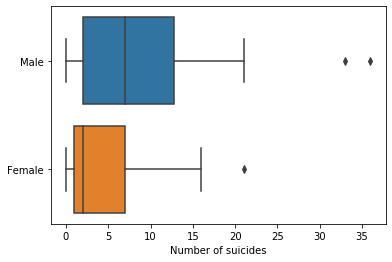

In [12]:
sns.boxplot(data = df, orient = 'h').set(xlabel='Number of suicides')

3. Написати функції:

-для оцінки вімінностей дисперсій між групами за критерієм Лівеня. Функція має повертати значення тесту та результат оцінки рівності дисперсій (significant або not significant).

-для визначення відмінності між групами за критерієм Стьюдента в залежності від рівності/відмінності дисперсій. Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).

Перевірити розбіжність на між групами на даних з п. 1.

In [35]:
def Levene(data):
    df = len(data) - 1
    t = []
    levene_table = pd.read_excel("Таблиця критичних значень для критерію Лівеня.xlsx")
    if (df > 20):
        t = levene_table.iloc[21,12]
    elif (df > 15):
        t = levene_table.iloc[df,11]
    elif (df > 15):
        t = levene_table.iloc[df,10]
    else:
        t = levene_table.iloc[df,df]
    
    st1 = np.std(data.iloc[:,0]);
    st2 = np.std(data.iloc[:,1]);
    
    if(st1 > st2):
        f = st1**2/st2**2 
    else:
        f = std**2/st1**2
    
    if(f > t):
        sign = "not signifcant"
    else:
        sign = "signifcant"
        
    return f,df,sign

In [36]:
Levene(df)

(2.6638224674705366, 49, 'not signifcant')

In [37]:
def Student(data,liv):
    n = len(data)
    df = 2*n - 2
    student = pd.read_excel("Таблиця критичних значень для критерію Стьюдента.xlsx")
    
    st1 = np.std(data.iloc[:,0])
    st2 = np.std(data.iloc[:,1])
    
    mn1 = np.mean(data.iloc[:,0])
    mn2 = np.mean(data.iloc[:,1])
    tb = 0

    if (liv == "significant"):
        t = abs(mn1 - mn2)/np.sqrt(st1**2/n + st2**2/n)
    else:
        t = abs(mn1 - mn2)/np.sqrt((((n-1)*st1**2+(n-1)*st2**2)/df) * (1/n + 1/n))

    for i in range(len(student)):
        if(df < int(student.iloc[i,0])):
            if(df != student.iloc[i-1,0]):
                if((student.iloc[i,0]-df) >= abs(student.iloc[i-1,0]-df)):
                    tb = student.iloc[i-1,1]
                else: 
                    tb = student.iloc[i,1]
                break
            else:
                tb = student.iloc[i-1,1]
                break
    
    if(t<tb):
        sign = "Significant"
    else:
        sign = "Not signifcant"
    
    return df, t, sign

In [38]:
Student(df, Levene(df))

(98, 3.0643305993446903, 'Not signifcant')

За допомогою тесту Лівеня було отримано результат, що припускає статистичну відмінність дисперсій<br>
За результатом тесту т-Стьюдента можна прийняти нульову гіпотезу 